In [0]:
# DO NOT DELETE THIS BLOCK 
# EMBEDDING WORD VISUALIZATION OVERVIEW
# ###############################################
# 1. Load the necessary model from the object
# 2. Save the embedding weights/ vectors & the ordered tokenizer dictionary to two separate files
# 3. Open the online Tensorflow Embedding Projector at the following link and load the two saved files there:
#     http://projector.tensorflow.org/
# This app can also be run in a local tensorboard UI instance, but we weren't able to handle it locally 
# 4. Once the embeddings are loaded, we can view them in a TSNE or PCA setting and observe the similarly occuring words 


# ###############################################
# Reference article from official docs : https://www.tensorflow.org/tutorials/text/word_embeddings


In [0]:
# we have to load drive coz the models & dataset are there 
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# set working directory -> you must set the path into which you have uploaded the files
# this is required in the case of colab or local 
%cd /content/drive/My\ Drive/SNLP\ Project

/content/drive/My Drive/SNLP Project


In [0]:
# list content of drive - verify you are where you are supposed to be
%ls


 amz_all_beauty/                    Lexical_analysis/
 amz_all_electronics/               meta_lstm_small_200dim.tsv
 CleantData_Apr-03-2020_01-31.zip   ModelResults/
 dataset_dumps.json                 ModelVisualization/
 Electronics_5.json.gz             'Project Ideas.gdoc'
 FinalModelResults/                'Project Proposal.gdoc'
'Final Report'/                    'Report MetaData'/
 glove.6B.200d.txt                 'Sentiment Analysis - Deep Learning.pptx'
 glove.6B.zip                       vecs_lstm_small_200dim.tsv


In [0]:
data_corpus = {
    'elec_small_lstm' : {
        'model_path' : 'ModelResults/v3_767c02af219c4133946edcaf89e67387/model.h5',
        'train_data_path' : 'amz_all_electronics/Data_Balanced_2000_Apr-03-2020_06-46/Train_2000_Apr-03-2020_06-46.zip',
        'test_data_path' : 'amz_all_electronics/Data_Balanced_2000_Apr-03-2020_06-46/Test_2000_Apr-03-2020_06-46.zip',
    },
}

# GLOBAL VARIABLE
CHOSEN_MODEL_TO_LOAD = 'elec_small_lstm'

In [0]:
# Necessary to load data, select rows and prepare tokenizer

Train_ZipCSVFileName = data_corpus[CHOSEN_MODEL_TO_LOAD]['train_data_path']
Test_ZipCSVFileName = data_corpus[CHOSEN_MODEL_TO_LOAD]['test_data_path']

import pandas as pd
import numpy as np


df_train = pd.read_csv(Train_ZipCSVFileName)
df_test = pd.read_csv(Test_ZipCSVFileName)

# Strip columns with 3 stars 
index_neutrals_train = df_train[ df_train['overall'] == 3 ].index
index_neutrals_test = df_test[ df_test['overall'] == 3 ].index
 
# Delete these row indexes from dataFrame
df_train.drop(index_neutrals_train , inplace=True)
df_test.drop(index_neutrals_test , inplace=True)

# Two classes 1-negative 5-postive (just for verbosity)
df_train.loc[(df_train.overall == 1),'overall']= 1
df_train.loc[(df_train.overall == 2),'overall']= 1
df_train.loc[(df_train.overall == 4),'overall']= 5
df_train.loc[(df_train.overall == 5),'overall']= 5

df_test.loc[(df_test.overall == 1),'overall']= 1
df_test.loc[(df_test.overall == 2),'overall']= 1
df_test.loc[(df_test.overall == 4),'overall']= 5
df_test.loc[(df_test.overall == 5),'overall']= 5

df_train['reviewText_len'].describe()

count    8000.000000
mean      146.234875
std       109.121888
min         1.000000
25%        47.000000
50%       127.000000
75%       223.250000
max       399.000000
Name: reviewText_len, dtype: float64

In [0]:
# Tokenize the data
# The maximum number of words to be used. (most frequent)
MAX_VOCAB_SIZE = 50000
# Max number of words in each segment.
MAX_SEQUENCE_LENGTH = 250

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words= MAX_VOCAB_SIZE, lower=True)
tokenizer.fit_on_texts(df_train['summary'] + ' DELIM '+ df_train['reviewText'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))



Found 8218 unique tokens.


In [0]:
# we have the word dict now lets load the trained model 
from tensorflow.keras.models import load_model
# Load the model
model = load_model(data_corpus[CHOSEN_MODEL_TO_LOAD]['model_path'])

embed = model.layers[0]
weights = embed.get_weights()[0] 

import io

embed_vect_file_name = 'vecs_' +CHOSEN_MODEL_TO_LOAD+ '.tsv'
words_meta_file_name = 'meta_' +CHOSEN_MODEL_TO_LOAD+ '.tsv'

out_v = io.open(embed_vect_file_name, 'w', encoding='utf-8')
out_m = io.open(words_meta_file_name, 'w', encoding='utf-8')

for key, k_idx in tokenizer.word_index.items():
  vec = weights[k_idx+1] # skip 0, it's padding.
  out_m.write(key + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
print('Files created in drive at root relative to what u called in block 2 of this notebook')
out_v.close()
out_m.close()


# DOWNLOAD THOSE FILES NOW
try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(embed_vect_file_name)
  files.download(words_meta_file_name)




In [0]:
# thats it, now u can load these files inside Projector and interact with a visual UI to see neighbourhood of specific words

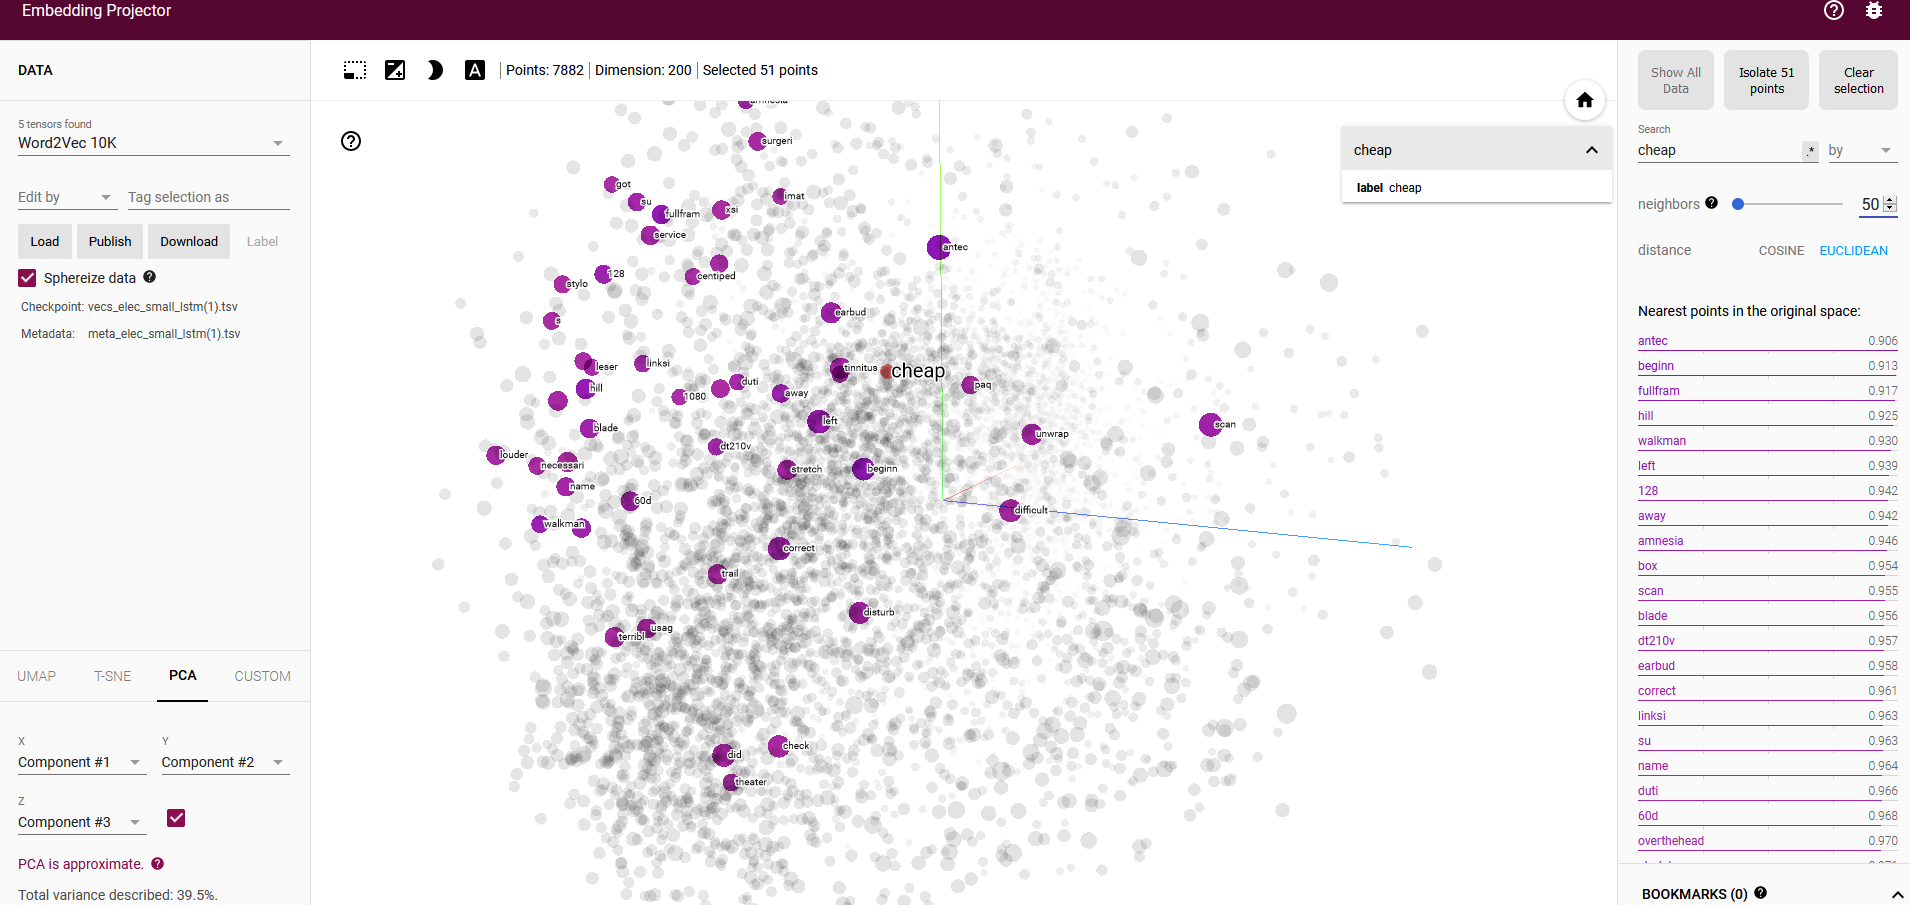